In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("cardio_train.csv")

# Overview 

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 14)

# Checking Missing Value

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
output         0
dtype: int64

# For X and Y column 

In [7]:
X=data.iloc[:,1:-1]
Y=data.iloc[:,-1:]

# Before Remove Outlier

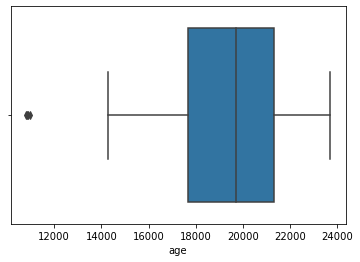

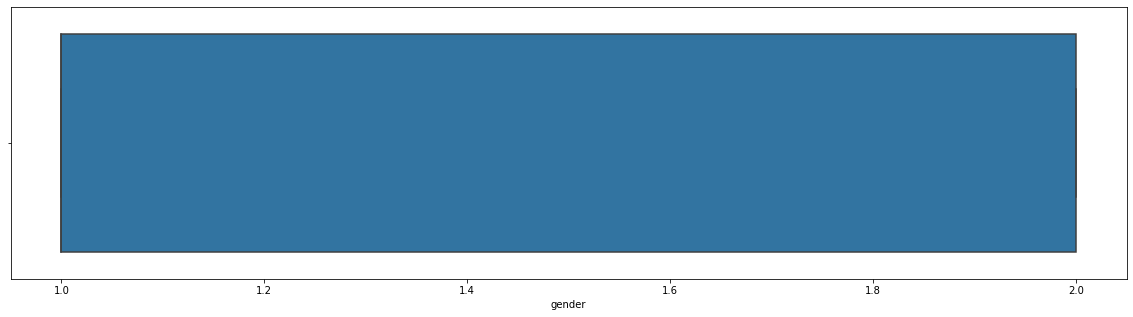

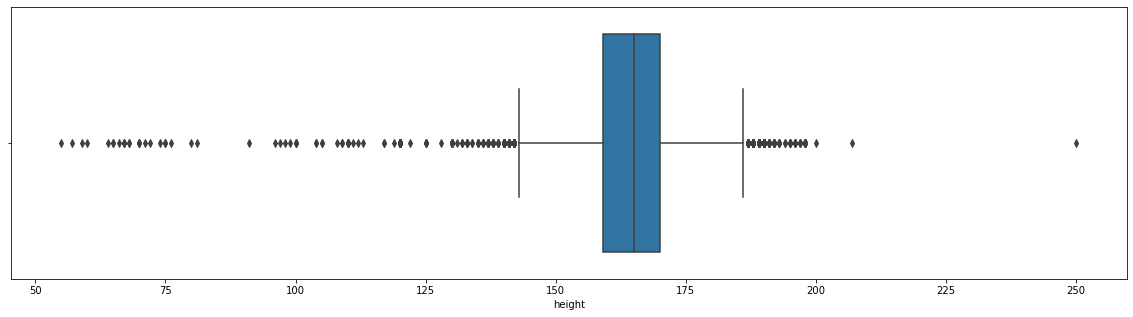

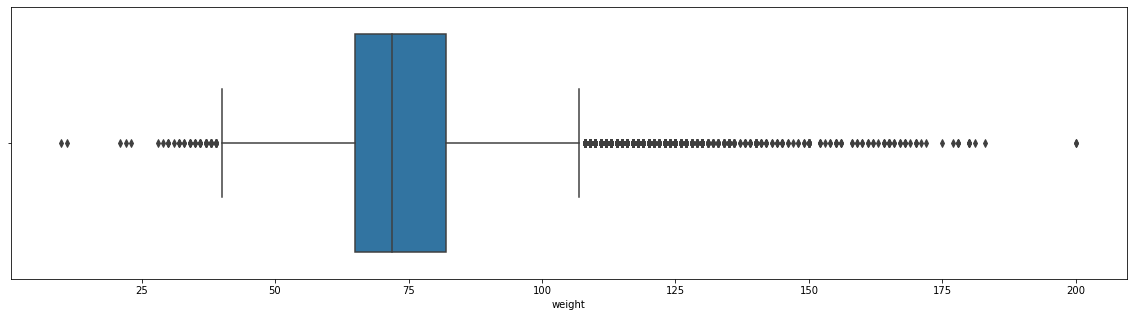

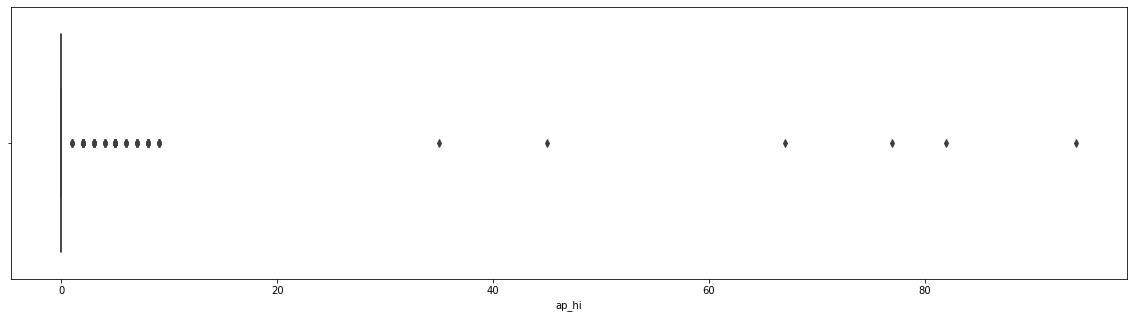

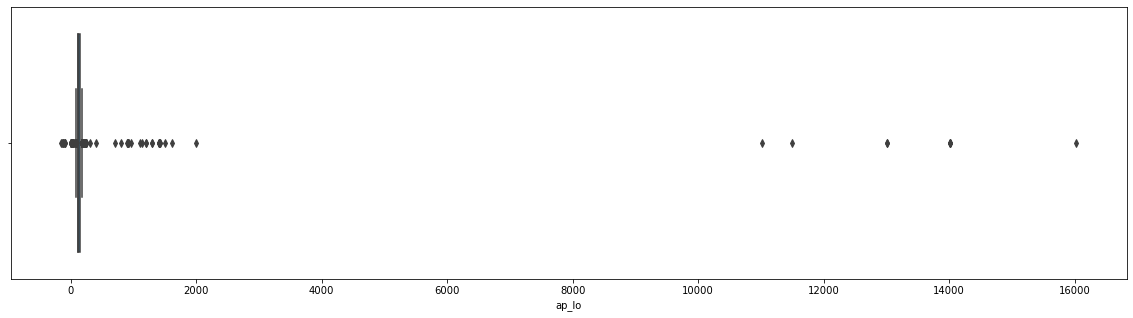

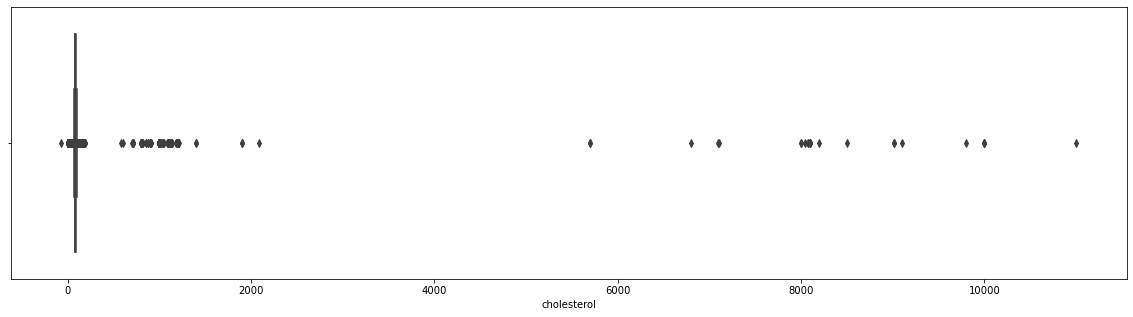

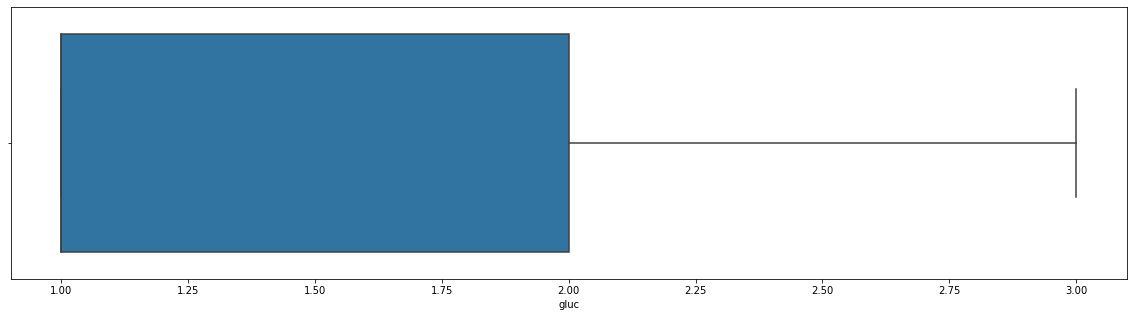

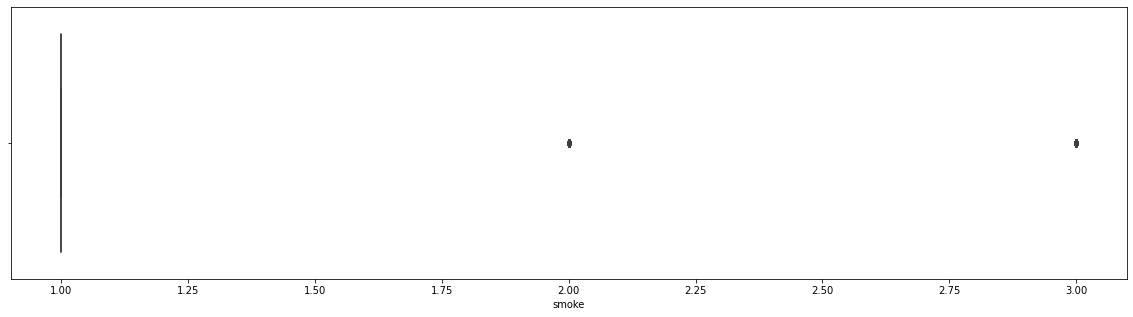

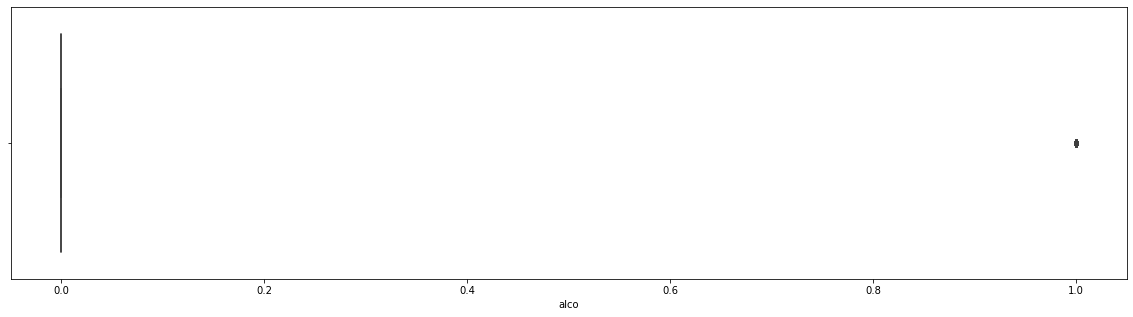

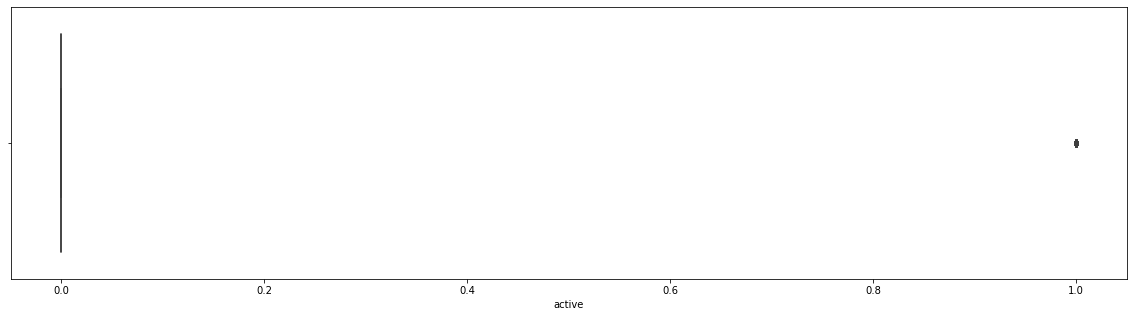

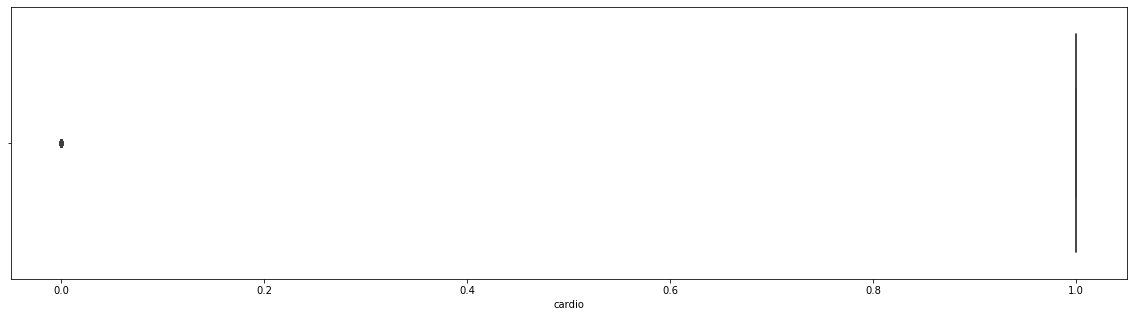

<Figure size 1440x360 with 0 Axes>

In [8]:
for i in data.iloc[:,1:-1]:
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Outlier Detect and Handle Function

In [9]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    #sns.boxplot(coloumn)
    return coloumn

# Handle Outlier

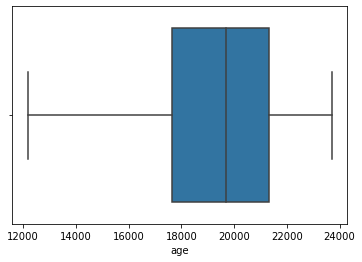

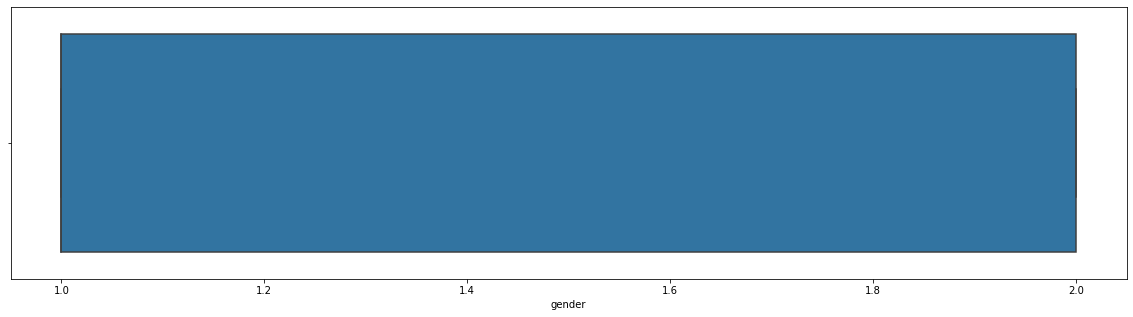

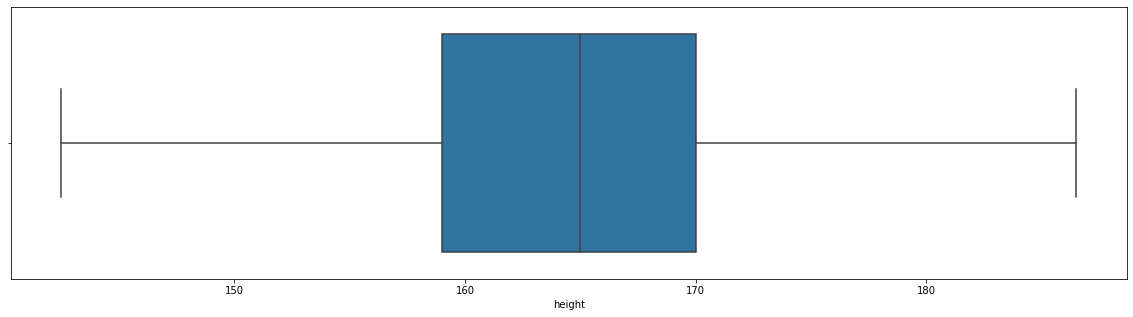

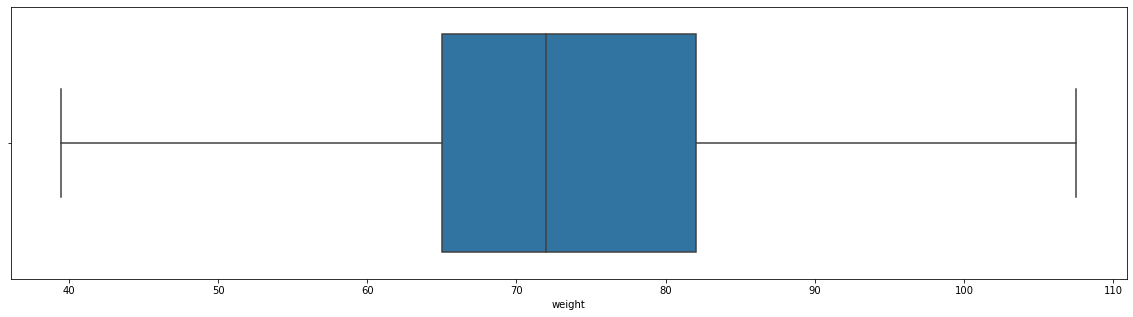

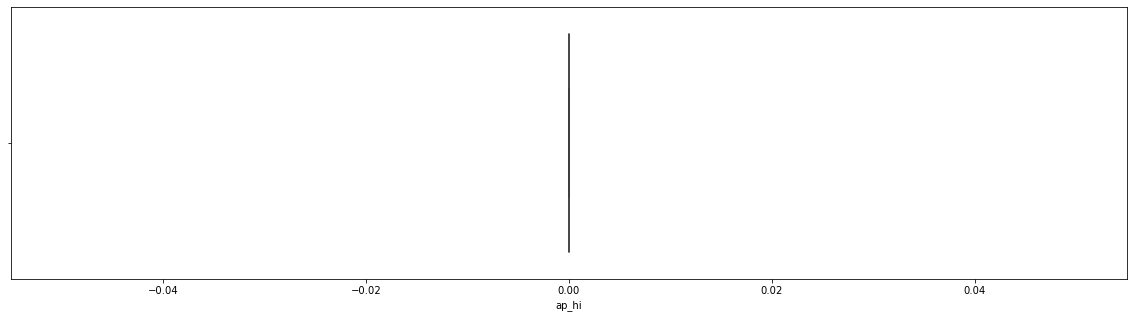

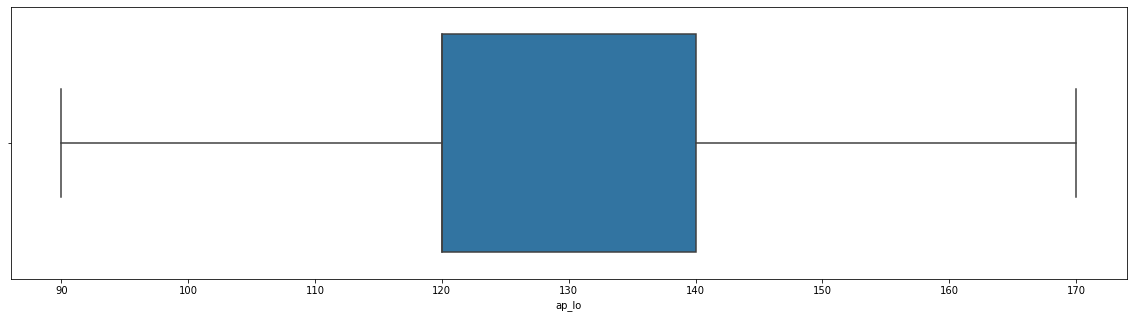

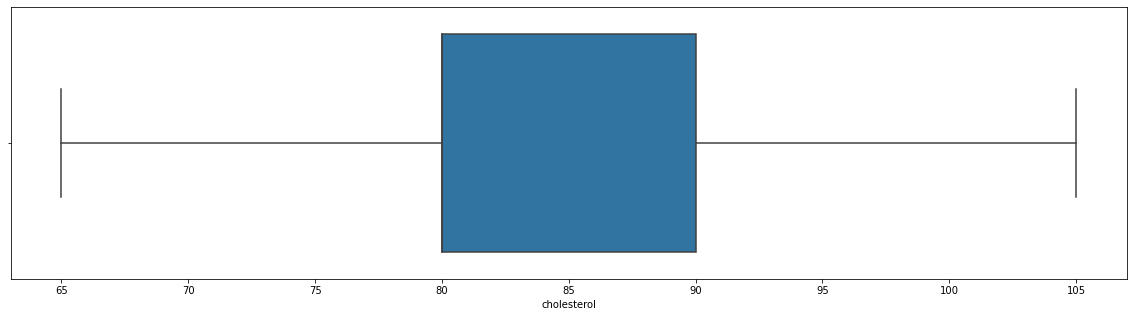

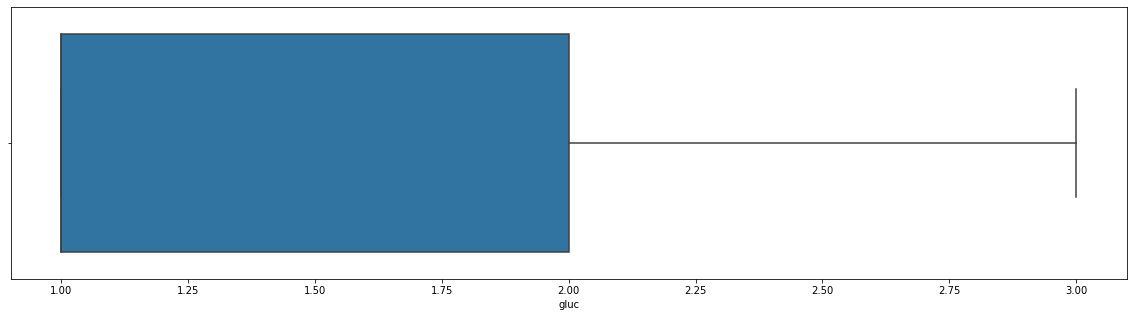

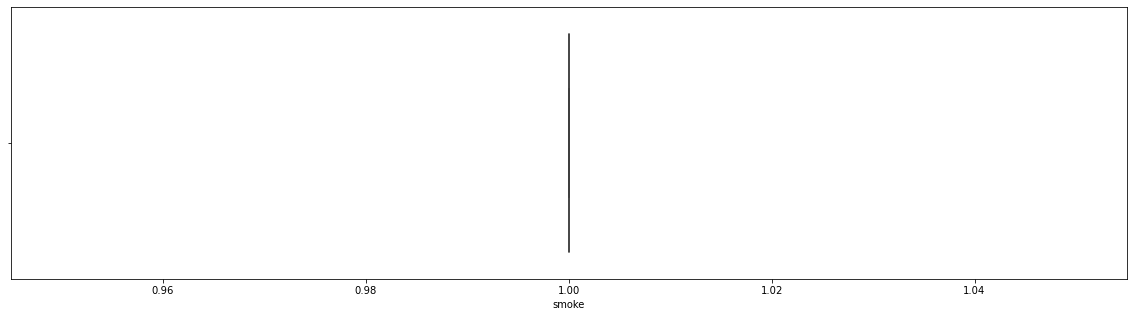

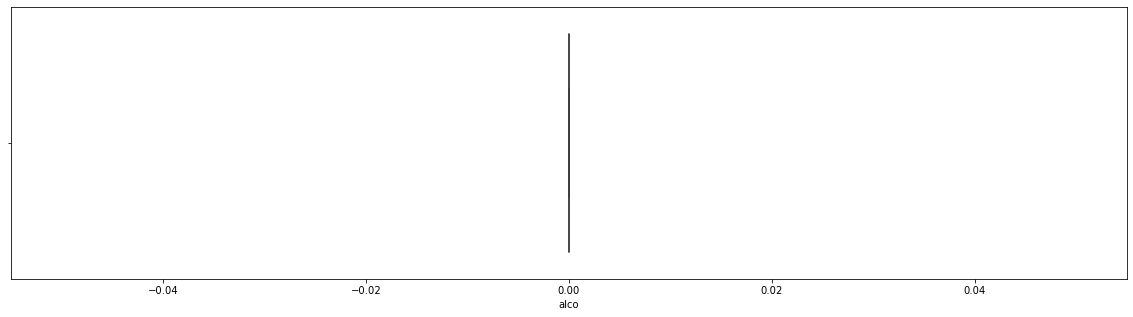

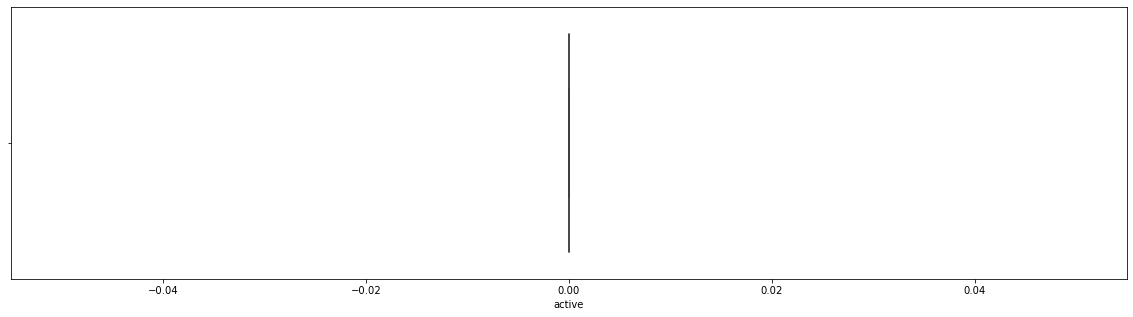

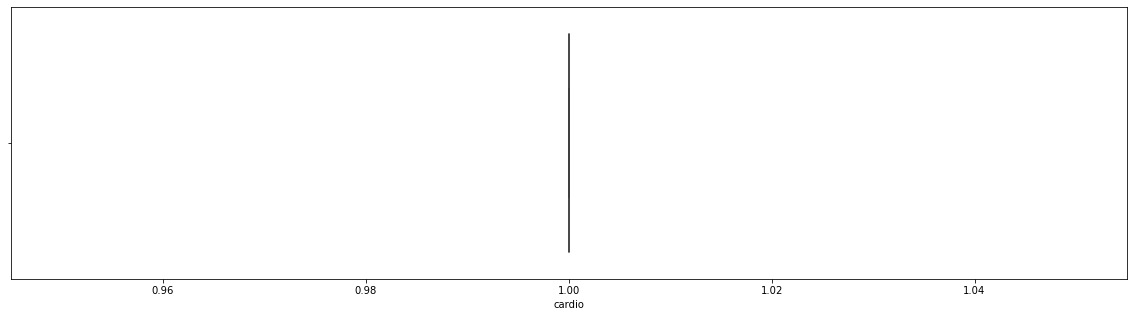

<Figure size 1440x360 with 0 Axes>

In [10]:
for i in data.iloc[:,1:-1]:
    data[i] = outlier(data[i])
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Applying Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# KFold and Cross Val Score

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation = KFold(10)

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
dta_time = end - start
print(results)
print(np.mean(results))
dtA=np.mean(results)
print("Decision Tree Run Time - ",dta_time)

[0.62542857 0.62857143 0.635      0.634      0.63971429 0.63357143
 0.63542857 0.62457143 0.63128571 0.634     ]
0.6321571428571429
Decision Tree Run Time -  0:00:04.174460


# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
rf_time = end - start
print(results)
print(np.mean(results))
rfA=np.mean(results)
print("Random Forest Run Time - ",rf_time)

[0.71385714 0.70971429 0.726      0.72228571 0.70928571 0.726
 0.71128571 0.71971429 0.70757143 0.71057143]
0.7156285714285715
Random Forest Run Time -  0:01:26.952604


# KNN Classifier (n=3)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
knnA_three_time = end - start
print(results)
print(np.mean(results))
knnA_three=np.mean(results)
print("KNN Classifier (n=3) Run Time - ",knnA_three_time)

[0.63514286 0.64028571 0.64428571 0.64757143 0.64128571 0.645
 0.64114286 0.63914286 0.63857143 0.63828571]
0.6410714285714285
KNN Classifier (n=3) Run Time -  0:00:59.387708


# KNN.Model Evaluation for k=5

In [47]:
model = KNeighborsClassifier(n_neighbors=5)
start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
knnA_five_time = end - start
print(results)
print(np.mean(results))
knnA_five=np.mean(results)
print("KNN Classifier (n=5) Run Time - ",knnA_five_time)

[0.64814286 0.65085714 0.65557143 0.65642857 0.65185714 0.65971429
 0.654      0.65771429 0.64385714 0.65171429]
0.6529857142857143
KNN Classifier (n=5) Run Time -  0:01:04.533255


# KNN Re-generating Model for K=7

In [48]:
model = KNeighborsClassifier(n_neighbors=7)

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
knnA_seven_time = end - start

print(results)
print(np.mean(results))
knnA_seven=np.mean(results)

print("KNN Classifier (n=7) Run Time - ", knnA_seven_time)

[0.65428571 0.65414286 0.667      0.66328571 0.65628571 0.66357143
 0.65757143 0.662      0.65371429 0.65842857]
0.6590285714285715
KNN Classifier (n=7) Run Time -  0:01:10.316481


# Naive Bayes

In [49]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
nbA_time = end - start

print(results)
print(np.mean(results))
nbA=np.mean(results)

print("Naive Bayes Run Time - ", nbA_time)

[0.579      0.583      0.58457143 0.57885714 0.56542857 0.57771429
 0.57028571 0.58414286 0.57671429 0.57771429]
0.5777428571428571
Naive Bayes Run Time -  0:00:00.377250


# Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

gbc_time = end - start

print(results)
print(np.mean(results))
gbc=np.mean(results)

print("Gradient Boosting Classifier Run Time - ", gbc_time)

[0.73242857 0.73128571 0.74142857 0.74171429 0.73157143 0.73885714
 0.73142857 0.74228571 0.73114286 0.73428571]
0.7356428571428572
Gradient Boosting Classifier Run Time -  0:01:19.942895


# Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

gbr_time = end - start

print(results)
print(np.mean(results))
gbr=np.mean(results)

print("Gradient Boosting Regressor Run Time - ", gbr_time)

[0.28093307 0.26681953 0.28791492 0.28356768 0.27994573 0.29040401
 0.27544159 0.29233671 0.26498545 0.27415848]
0.2796507167103773
Gradient Boosting Regressor Run Time -  0:01:21.356416


# Support Vector Machine

In [22]:
from sklearn.svm import SVC
model=SVC()

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

svm_time = end - start

print(results)
print(np.mean(results))
svmA=np.mean(results)

print("SVM Run Time - ", svm_time)

[0.72228571 0.72614286 0.734      0.73614286 0.72242857 0.72942857
 0.726      0.73285714 0.72385714 0.72728571]
0.7280428571428571
SVM Run Time -  0:46:17.633779


# SVM Linear Kernel

In [23]:
svm = SVC(kernel= 'linear', random_state=1, C=0.1)

start = datetime.datetime.now()
results=cross_val_score(svm,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

svm_linear_kernel_time = end - start

print(results)
print(np.mean(results))
svm_linear_kernel=np.mean(results)

print("SVM Linear Kernel Run Time - ", svm_linear_kernel_time)

[0.71657143 0.72       0.72571429 0.72842857 0.72057143 0.72542857
 0.72185714 0.72714286 0.71642857 0.71871429]
0.7220857142857142
SVM Linear Kernel Run Time -  0:33:24.828296


# SVM SGDClassifier

In [24]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge')


start = datetime.datetime.now()
results=cross_val_score(sgd,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

svm_sgd_time = end - start

print(results)
print(np.mean(results))
svm_sgd=np.mean(results)

print("SVM SGDClassifier Run Time - ", svm_sgd_time)

[0.71114286 0.718      0.72371429 0.72428571 0.71914286 0.72471429
 0.72242857 0.71914286 0.71528571 0.71528571]
0.7193142857142858
SVM SGDClassifier Run Time -  0:00:03.272046


In [73]:
mlp_score = 0.8226285714285714
tabnet_score = 0.6526666666666667

# Accuracy Plotting

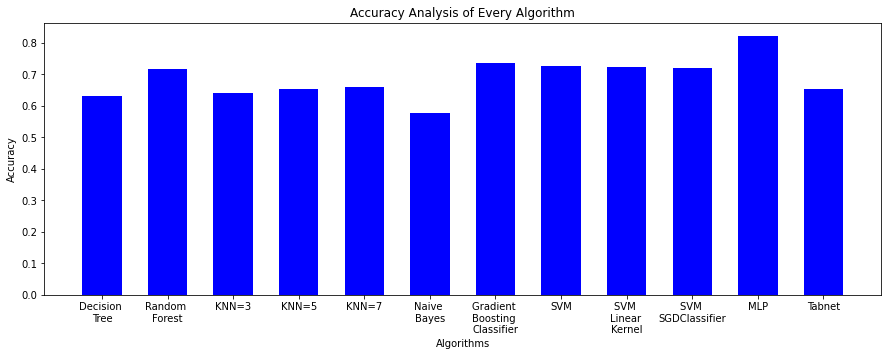

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))

algo = ['Decision \nTree', 'Random \nForest', 'KNN=3', 'KNN=5', 'KNN=7', 'Naive \nBayes', 'Gradient \nBoosting \nClassifier', 'SVM', 'SVM \nLinear \nKernel', 'SVM \nSGDClassifier', 'MLP', 'Tabnet']

algo_accuracy = [dtA, rfA, knnA_three, knnA_five, knnA_seven, nbA, gbc, svmA, svm_linear_kernel, svm_sgd, mlp_score, tabnet_score]

plt.bar(algo, algo_accuracy, color ='blue', width=0.6)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Analysis of Every Algorithm")
plt.show()

# Plotting Run Time of every Algorithm (Microseconds)

In [61]:
dta_time_micro= dta_time / datetime.timedelta(microseconds=1)
rf_time_micro = rf_time / datetime.timedelta(microseconds=1)
knnA_three_time_micro = knnA_three_time / datetime.timedelta(microseconds=1)
knnA_five_time_micro = knnA_five_time / datetime.timedelta(microseconds=1)
knnA_seven_time_micro = knnA_seven_time / datetime.timedelta(microseconds=1)
nbA_time_micro = nbA_time / datetime.timedelta(microseconds=1)
gbc_time_micro = gbc_time / datetime.timedelta(microseconds=1)
svm_time_micro = svm_time / datetime.timedelta(microseconds=1)
svm_linear_kernel_time_micro = svm_linear_kernel_time / datetime.timedelta(microseconds=1)
svm_sgd_time_micro = svm_sgd_time / datetime.timedelta(microseconds=1)
tabnet_time_micro = 1873610.0
mlp_time_micro = 1021559788.0

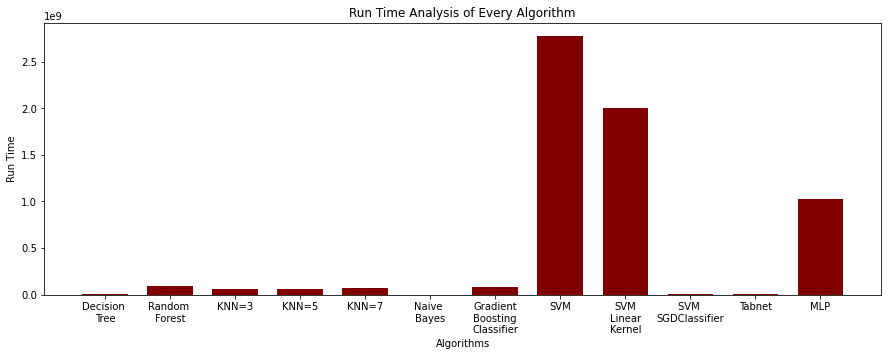

In [71]:
fig = plt.figure(figsize = (15, 5))
algo = ['Decision \nTree', 'Random \nForest', 'KNN=3', 'KNN=5', 'KNN=7', 'Naive \nBayes', 'Gradient\nBoosting\nClassifier', 'SVM', 'SVM\nLinear\nKernel', 'SVM \nSGDClassifier', 'Tabnet', 'MLP']

algo_run_time = [dta_time_micro, rf_time_micro, knnA_three_time_micro, knnA_five_time_micro, knnA_seven_time_micro, nbA_time_micro, gbc_time_micro, svm_time_micro, svm_linear_kernel_time_micro, svm_sgd_time_micro, tabnet_time_micro, mlp_time_micro]

plt.bar(algo, algo_run_time, color ='maroon', width=0.7)

plt.xlabel("Algorithms")
plt.ylabel("Run Time")
plt.title("Run Time Analysis of Every Algorithm")
plt.show()